In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_cases = pd.read_csv("covid_confirmed_usafacts.csv")
data_deaths = pd.read_csv("covid_deaths_usafacts.csv")
#data_usmap = pd.read_csv("./static/data/US_MAP_DATA.csv")


In [23]:
data_deaths.State.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [5]:
# Function to calculate rate per day
def perday(vin):
    n = vin.shape[0]
    vout = np.zeros(vin.shape)
    vout[0] = vin[0]
    for i in range(1,n):
        vout[i] = vin[i]-vin[i-1]
   
    return vout

In [6]:
# Cases Data Frame
data_cases_by_state = data_cases.groupby(by=['State']).sum()
data_cases_by_state = data_cases_by_state.reset_index()
data_cases_by_state = data_cases_by_state.drop(['countyFIPS' , 'stateFIPS'],axis=1)
list_states = list(data_cases_by_state['State'])
df_tran = pd.DataFrame(columns=['Date','Cases_Sum','State'])
for st in list_states:
    dftemp = data_cases_by_state[data_cases_by_state['State'] == st]
    dftemp = dftemp.drop('State',axis=1)
    dftemp = dftemp.transpose()
    dftemp = dftemp.reset_index()
    dftemp = dftemp.rename(columns ={dftemp.columns[0]:'Date',dftemp.columns[1]:'Cases_Sum'},)
    csum = np.array(dftemp['Cases_Sum'])
    dftemp['Cases_Day'] = perday(csum)
    dftemp['State']=st
    df_tran = df_tran.append(dftemp, sort=False)
  

In [7]:
# Death Data Frame
data_deaths_by_state = data_deaths.groupby(by=['State']).sum()
data_deaths_by_state = data_deaths_by_state.reset_index()
data_deaths_by_state = data_deaths_by_state.drop(['countyFIPS' , 'stateFIPS'],axis=1)
list_states = list(data_deaths_by_state['State'])
df_tran2 = pd.DataFrame(columns=['Date','Deaths_Sum','State'])

for st in list_states:
    dftemp = data_deaths_by_state[data_deaths_by_state['State'] == st]
    dftemp = dftemp.drop('State',axis=1)
    dftemp = dftemp.transpose()
    dftemp = dftemp.reset_index()
    dftemp = dftemp.rename(columns ={dftemp.columns[0]:'Date',dftemp.columns[1]:'Deaths_Sum'},)
    csum = np.array(dftemp['Deaths_Sum'])
    dftemp['Deaths_Day'] = perday(csum)
    dftemp['State']=st
    df_tran2 = df_tran2.append(dftemp, sort=False)

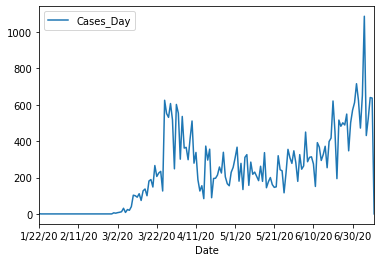

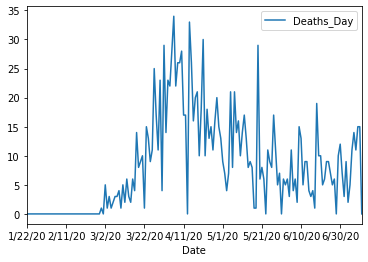

In [21]:
st = 'WA'
df_tran[df_tran['State'] == st].plot(x='Date',y='Cases_Day')
df_tran2[df_tran2['State'] == st].plot(x='Date',y='Deaths_Day')
plt.show()

In [9]:
df_tran2.to_csv('covid_death_proccessed.csv')
df_tran.to_csv('covid_cases_proccessed.csv')

In [11]:
df_tran.head(100)

,Date,Cases_Sum,State,Cases_Day
0,1/22/20,0,AK,0.0
1,1/23/20,0,AK,0.0
2,1/24/20,0,AK,0.0
3,1/25/20,0,AK,0.0
4,1/26/20,0,AK,0.0
5,1/27/20,0,AK,0.0
6,1/28/20,0,AK,0.0
7,1/29/20,0,AK,0.0
8,1/30/20,0,AK,0.0
9,1/31/20,0,AK,0.0
